## Imports

In [2]:
import sys
import os
import pickle

library_path = os.path.join('..', '..', '..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)

from pathlib import Path
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation.metrics import *
from neuralhydrology.nh_run import start_run, eval_run, finetune
from neuralhydrology.utils.nh_results_ensemble import create_results_ensemble
from neuralhydrology.UCB_training.UCB_train import UCB_trainer
from neuralhydrology.UCB_training.UCB_train import clean_daily
from neuralhydrology.UCB_training.UCB_train import combinedPlot
from neuralhydrology.evaluation.metrics import calculate_all_metrics

## Working directory

In [4]:
print("Current Working Directory:", os.getcwd())
print("Train Basin File Exists:", os.path.exists("warm springs"))

Current Working Directory: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all
Train Basin File Exists: True


## Standard daily LSTM, train on training subset, evaluate on evaluation period (for hyperparameter search)

In [6]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("warm_springs_dam.yaml")
params = {
    "epochs":16,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
#defaults to daily so no need to specify hourly
lstmNoPhysicsDaily = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params)

In [7]:
lstmNoPhysicsDaily.train()

2025-01-29 13:45:12,908: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134512\output.log initialized.
2025-01-29 13:45:12,908: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134512
2025-01-29 13:45:12,908: ### Run configurations for testing_run
2025-01-29 13:45:12,908: experiment_name: testing_run
2025-01-29 13:45:12,908: train_basin_file: warm springs
2025-01-29 13:45:12,908: validation_basin_file: warm springs
2025-01-29 13:45:12,908: test_basin_file: warm springs
2025-01-29 13:45:12,908: train_start_date: 1994-10-01 00:00:00
2025-01-29 13:45:12,908: train_end_date: 2002-09-30 00:00:00
2025-01-29 13:45:12,908: validation_start_date: 2002-10-01 00:00:00
2025-01-29 13:45:12,924: validation_end_date: 2005-09-30 00:00:00
2025-01-29 13:45:12,924: test_start_date: 2005-10-01 00:00:00
2025-01-29 13:45:12,924: test_end_date: 2009-09-30 00:00:00
2025-01-29 13:45:12,924: device: cpu
2025

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sel

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]
2025-01-29 13:45:40,824: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134512\validation\model_epoch016\validation_metrics.csv
2025-01-29 13:45:40,827: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134512\validation\model_epoch016\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_2901_134512')

Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH
Observed_key: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH_obs
Simulated_key: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH_sim


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Pl

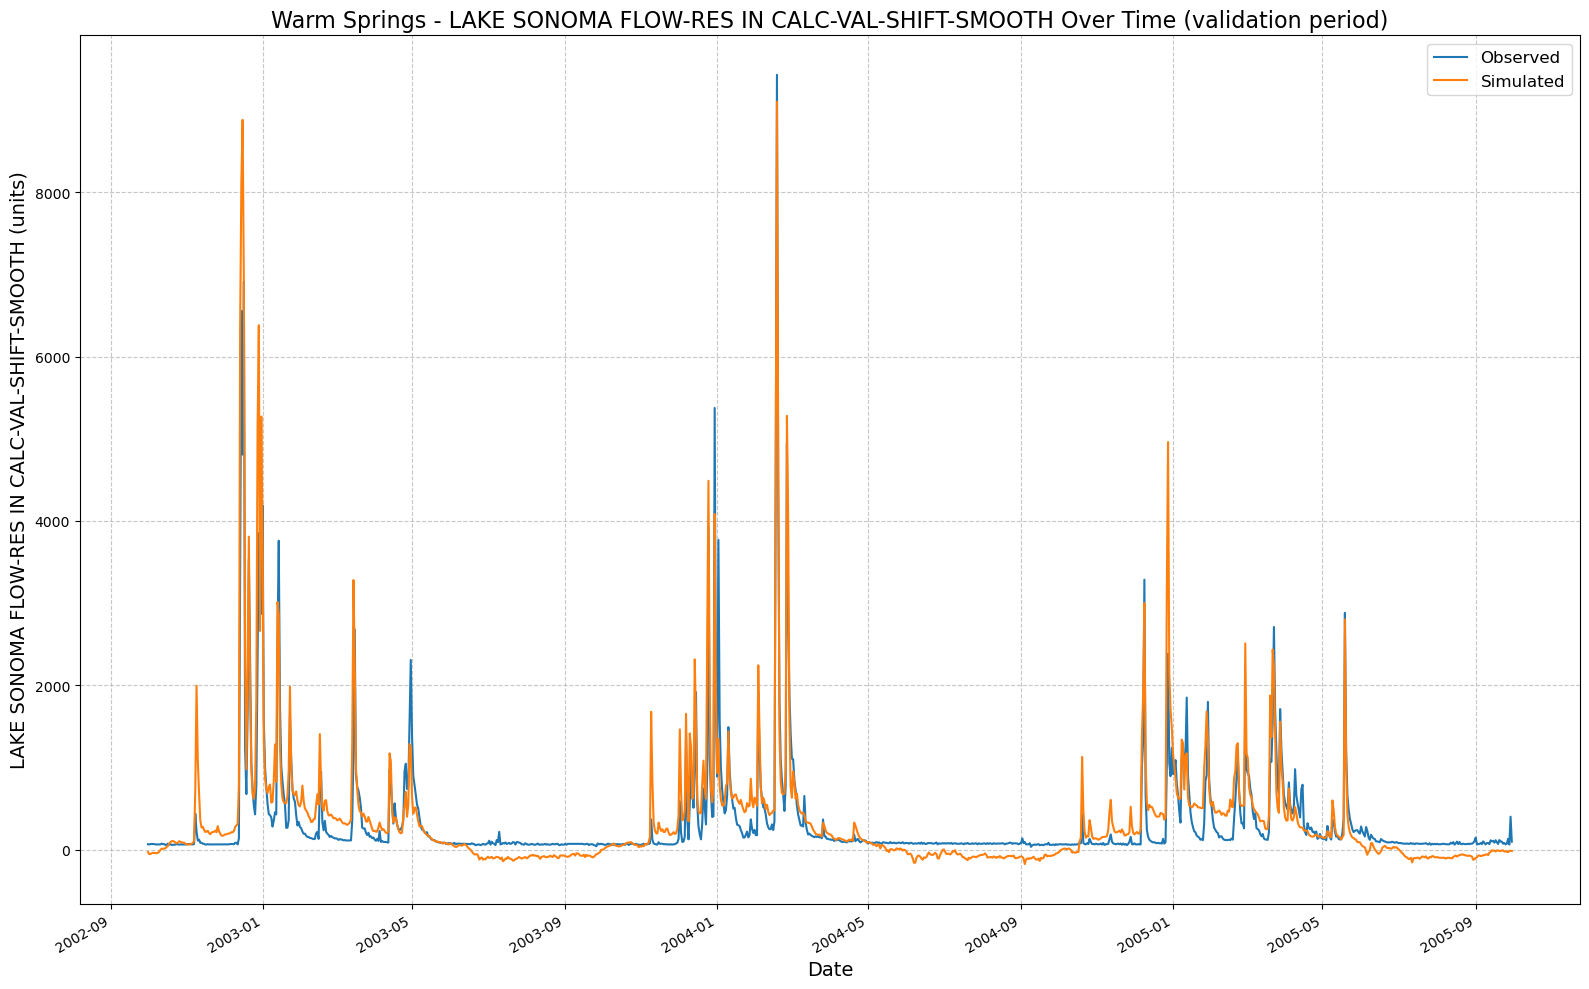

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134512\results_output_validation.csv


({'NSE': 0.7467280030250549,
  'MSE': 124183.96875,
  'RMSE': 352.3974584897002,
  'KGE': 0.7550285883143636,
  'Alpha-NSE': 1.2004177108639256,
  'Beta-KGE': 1.1102629899978638,
  'Beta-NSE': 0.05125230016851559,
  'Pearson-r': 0.9123312669645074,
  'FHV': 18.583622574806213,
  'FMS': 1163.6527140344003,
  'FLV': 99.9999995110746,
  'Peak-Timing': 0.4,
  'Peak-MAPE': 12.337822914123535},
 WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_2901_134512/results_output_validation.csv'))

In [8]:
lstmNoPhysicsDaily.results()

## Physics-informed LSTM, train on training subset, evaluate on evaluation period (for hyperparameter search)

In [10]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("warm_springs_dam.yaml")
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/WarmSprings_Inflow_daily.csv")
params = {
    "epochs":16,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from daily.csv
    "DRY CREEK 20 PRECIP-INC SCREENED",
    "DRY CREEK 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 30 PRECIP-INC SCREENED",
    "DRY CREEK 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    #from Warm_Spring_Inflow.csv
    'Dry Creek 20 ET-POTENTIAL', 
    'Dry Creek 20 FLOW',
    'Dry Creek 20 FLOW-BASE', 
    'Dry Creek 20 INFILTRATION',
    'Dry Creek 20 PERC-SOIL',
    'Dry Creek 20 SATURATION FRACTION',
    'Dry Creek 30 ET-POTENTIAL', 
    'Dry Creek 30 FLOW',
    'Dry Creek 30 FLOW-BASE', 
    'Dry Creek 30 INFILTRATION',
    'Dry Creek 30 PERC-SOIL',
    'Dry Creek 30 SATURATION FRACTION',
    'Warm Springs Dam Inflow FLOW',
    ]
lstmPhysicsDaily = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=False)

In [11]:
lstmPhysicsDaily.train()

2025-01-29 13:45:41,838: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134541\output.log initialized.
2025-01-29 13:45:41,840: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134541
2025-01-29 13:45:41,842: ### Run configurations for testing_run
2025-01-29 13:45:41,843: experiment_name: testing_run
2025-01-29 13:45:41,845: train_basin_file: warm springs
2025-01-29 13:45:41,848: validation_basin_file: warm springs
2025-01-29 13:45:41,850: test_basin_file: warm springs
2025-01-29 13:45:41,851: train_start_date: 1994-10-01 00:00:00
2025-01-29 13:45:41,852: train_end_date: 2002-09-30 00:00:00
2025-01-29 13:45:41,854: validation_start_date: 2002-10-01 00:00:00
2025-01-29 13:45:41,856: validation_end_date: 2005-09-30 00:00:00
2025-01-29 13:45:41,858: test_start_date: 2005-10-01 00:00:00
2025-01-29 13:45:41,859: test_end_date: 2009-09-30 00:00:00
2025-01-29 13:45:41,860: device: cpu
2025

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sel

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]
2025-01-29 13:46:04,701: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134541\validation\model_epoch016\validation_metrics.csv
2025-01-29 13:46:04,704: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134541\validation\model_epoch016\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_2901_134541')

Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH
Observed_key: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH_obs
Simulated_key: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH_sim


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Pl

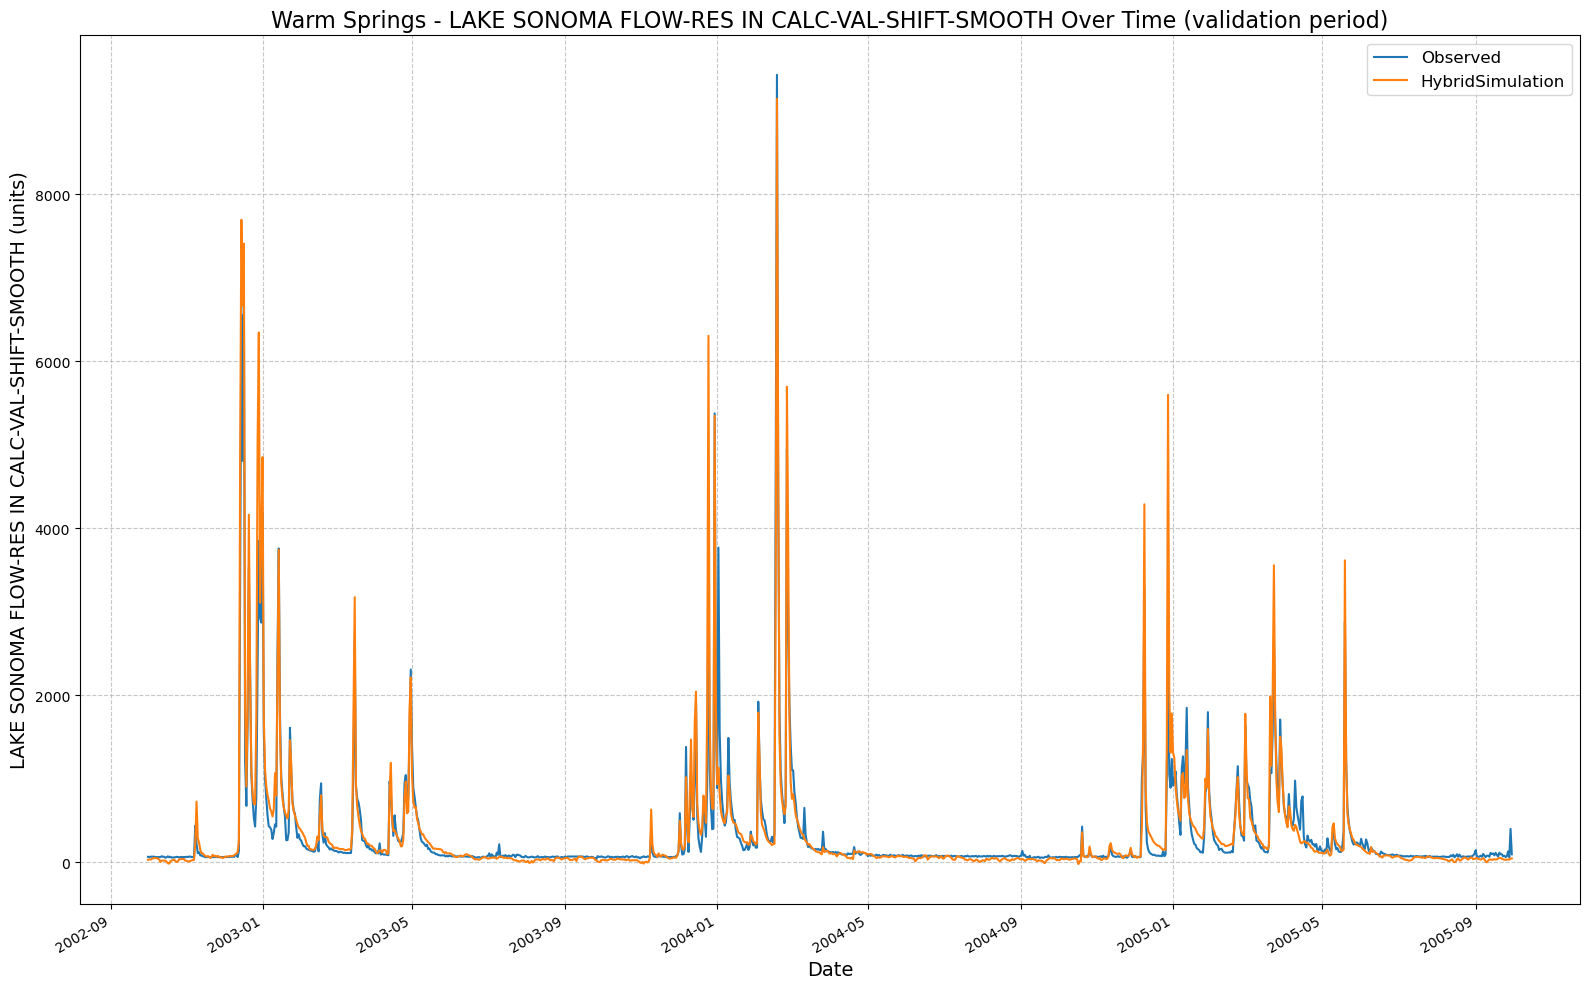

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134541\results_output_validation.csv


({'NSE': 0.8740508407354355,
  'MSE': 61755.2109375,
  'RMSE': 248.5059575493111,
  'KGE': 0.8283222445714638,
  'Alpha-NSE': 1.1578376485254471,
  'Beta-KGE': 1.0517549514770508,
  'Beta-NSE': 0.024056683578659945,
  'Pearson-r': 0.956618512997526,
  'FHV': 20.987965166568756,
  'FMS': 26.351733004738442,
  'FLV': -2582.063223298404,
  'Peak-Timing': 0.0,
  'Peak-MAPE': 14.049762487411499},
 WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_2901_134541/results_output_validation.csv'))

In [12]:
lstmPhysicsDaily.results()

## Retrain LSTM on entire train period using best hyperparameters, evaluate on test period

In [14]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("warm_springs_dam.yaml")
params = {
    "epochs":32,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
#defaults to daily so no need to specify hourly
lstmNoPhysicsDailyExtended = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, hourly=False, extend_train_period=True)

In [15]:
lstmNoPhysicsDailyExtended.train()

2025-01-29 13:46:05,577: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134605\output.log initialized.
2025-01-29 13:46:05,578: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134605
2025-01-29 13:46:05,580: ### Run configurations for testing_run
2025-01-29 13:46:05,582: experiment_name: testing_run
2025-01-29 13:46:05,583: train_basin_file: warm springs
2025-01-29 13:46:05,584: validation_basin_file: warm springs
2025-01-29 13:46:05,585: test_basin_file: warm springs
2025-01-29 13:46:05,587: train_start_date: 1994-10-01 00:00:00
2025-01-29 13:46:05,587: train_end_date: 2005-09-30 00:00:00
2025-01-29 13:46:05,589: validation_start_date: 2002-10-01 00:00:00
2025-01-29 13:46:05,589: validation_end_date: 2005-09-30 00:00:00
2025-01-29 13:46:05,590: test_start_date: 2005-10-01 00:00:00
2025-01-29 13:46:05,591: test_end_date: 2009-09-30 00:00:00
2025-01-29 13:46:05,593: device: cpu
2025

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sel

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]
2025-01-29 13:46:59,861: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134605\validation\model_epoch032\validation_metrics.csv
2025-01-29 13:46:59,864: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134605\validation\model_epoch032\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_2901_134605')

2025-01-29 13:46:59,945: Using the model weights from F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134605\model_epoch032.pt


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sel

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]
2025-01-29 13:47:00,482: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134605\test\model_epoch032\test_metrics.csv
2025-01-29 13:47:00,484: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134605\test\model_epoch032\test_results.p
Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH
Observed_key: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH_obs
Simulated_key: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH_sim


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Pl

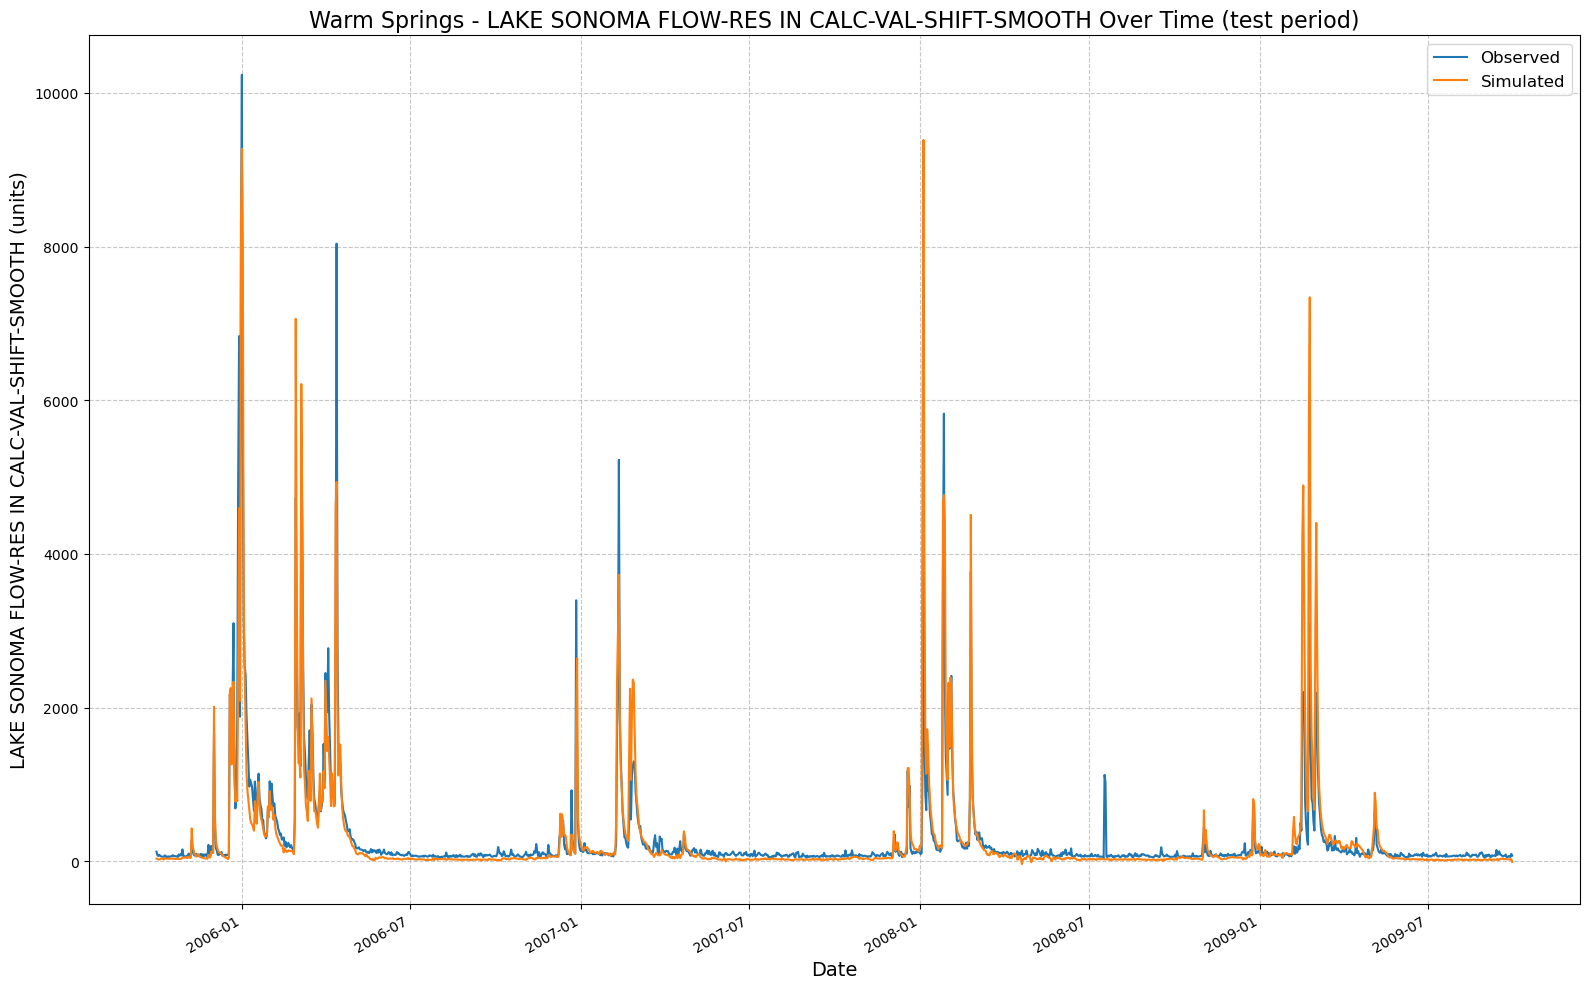

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134605\results_output_test.csv


In [16]:
lstm_result_metrics, lstm_result_path = lstmNoPhysicsDailyExtended.results('test')

In [17]:
lstm_result_metrics

{'NSE': 0.797388106584549,
 'MSE': 108428.3203125,
 'RMSE': 329.28455826609905,
 'KGE': 0.8477826744339764,
 'Alpha-NSE': 1.1251068575916823,
 'Beta-KGE': 0.9750438928604126,
 'Beta-NSE': -0.01014948966165837,
 'Pearson-r': 0.9169603642683519,
 'FHV': 16.473224759101868,
 'FMS': 102.17227045494037,
 'FLV': -2087.897515507608,
 'Peak-Timing': 0.3333333333333333,
 'Peak-MAPE': 55.91825246810913}

## Retrain PI-LSTM on entire train period using best hyperparameters, evaluate on test period

In [19]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("warm_springs_dam.yaml")
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/WarmSprings_Inflow_daily.csv")
params = {
    "epochs":32,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
    "batch_size": 128
}
features_with_physics = [
    #from daily.csv
    "DRY CREEK 20 PRECIP-INC SCREENED",
    "DRY CREEK 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 30 PRECIP-INC SCREENED",
    "DRY CREEK 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    #from Warm_Spring_Inflow.csv
    'Dry Creek 20 ET-POTENTIAL', 
    'Dry Creek 20 FLOW',
    'Dry Creek 20 FLOW-BASE', 
    'Dry Creek 20 INFILTRATION',
    'Dry Creek 20 PERC-SOIL',
    'Dry Creek 20 SATURATION FRACTION',
    'Dry Creek 30 ET-POTENTIAL', 
    'Dry Creek 30 FLOW',
    'Dry Creek 30 FLOW-BASE', 
    'Dry Creek 30 INFILTRATION',
    'Dry Creek 30 PERC-SOIL',
    'Dry Creek 30 SATURATION FRACTION',
    'Warm Springs Dam Inflow FLOW',
    ]
#extend train period set to true
lstmPhysicsDailyExtended = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=False, extend_train_period=True)

In [20]:
lstmPhysicsDailyExtended.train()

2025-01-29 13:47:01,350: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134701\output.log initialized.
2025-01-29 13:47:01,353: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134701
2025-01-29 13:47:01,354: ### Run configurations for testing_run
2025-01-29 13:47:01,356: experiment_name: testing_run
2025-01-29 13:47:01,359: train_basin_file: warm springs
2025-01-29 13:47:01,362: validation_basin_file: warm springs
2025-01-29 13:47:01,365: test_basin_file: warm springs
2025-01-29 13:47:01,367: train_start_date: 1994-10-01 00:00:00
2025-01-29 13:47:01,370: train_end_date: 2005-09-30 00:00:00
2025-01-29 13:47:01,372: validation_start_date: 2002-10-01 00:00:00
2025-01-29 13:47:01,373: validation_end_date: 2005-09-30 00:00:00
2025-01-29 13:47:01,375: test_start_date: 2005-10-01 00:00:00
2025-01-29 13:47:01,376: test_end_date: 2009-09-30 00:00:00
2025-01-29 13:47:01,378: device: cpu
2025

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sel

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]
2025-01-29 13:48:43,503: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134701\validation\model_epoch032\validation_metrics.csv
2025-01-29 13:48:43,506: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134701\validation\model_epoch032\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_2901_134701')

2025-01-29 13:48:43,626: Using the model weights from F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134701\model_epoch032.pt


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sel

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]
2025-01-29 13:48:44,458: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134701\test\model_epoch032\test_metrics.csv
2025-01-29 13:48:44,461: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134701\test\model_epoch032\test_results.p
Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH
Observed_key: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH_obs
Simulated_key: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH_sim


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Pl

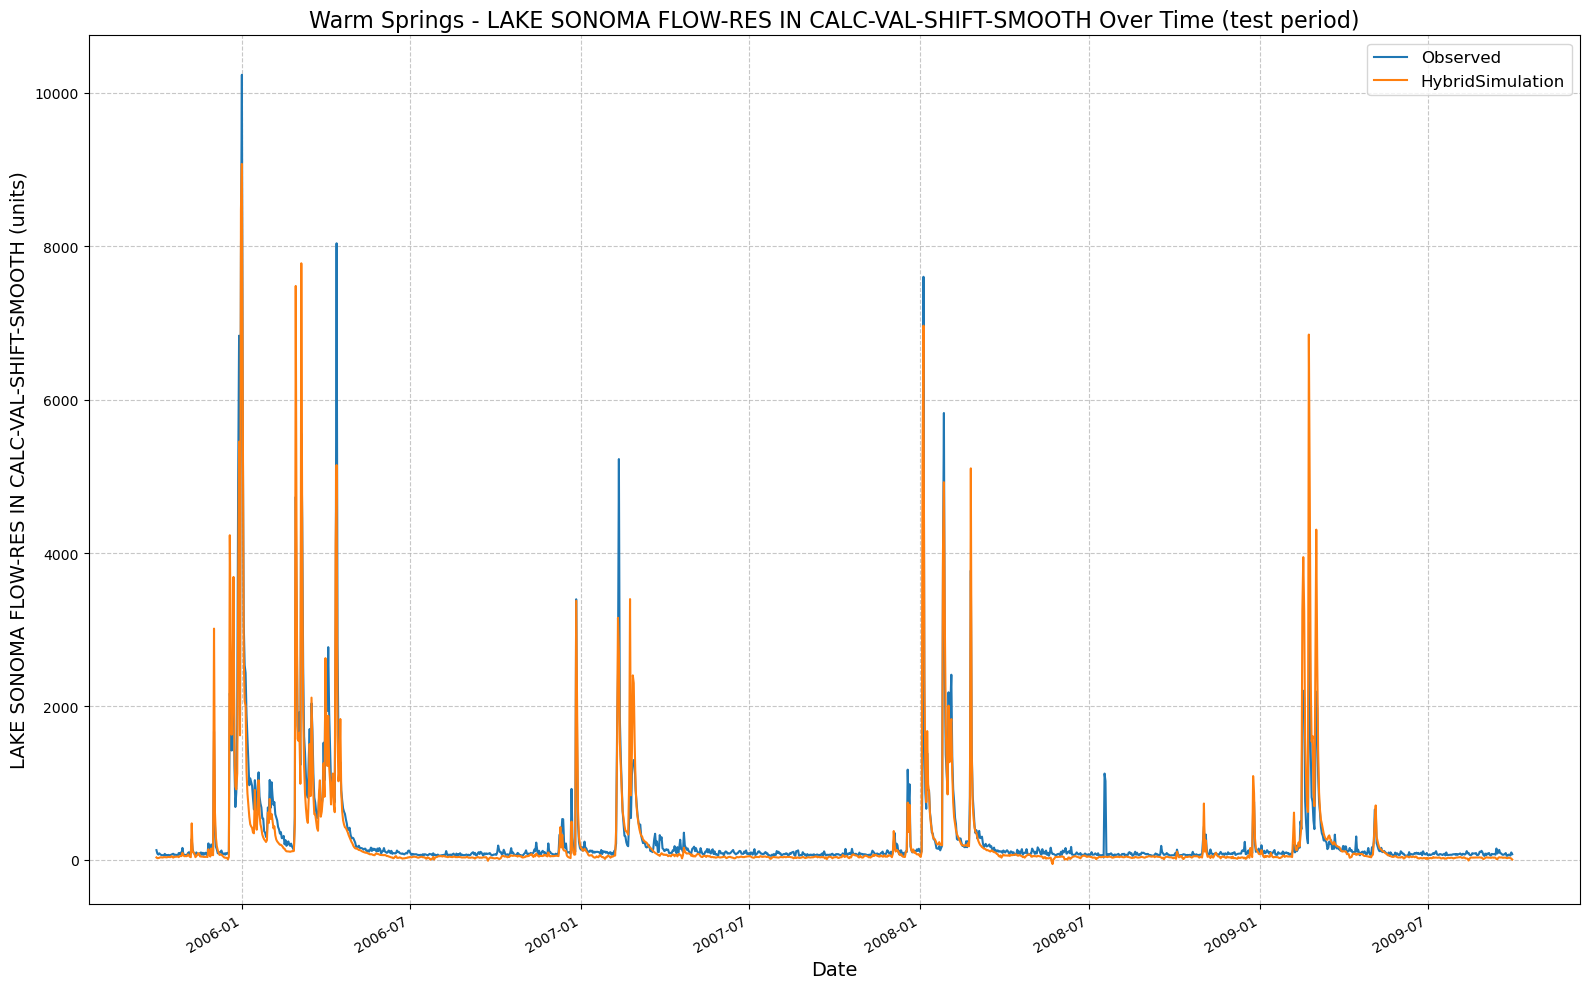

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_134701\results_output_test.csv


In [21]:
physics_informed_result_metrics, physics_informed_result_path = lstmPhysicsDailyExtended.results('test')

In [22]:
physics_informed_result_metrics

{'NSE': 0.8304316401481628,
 'MSE': 90744.984375,
 'RMSE': 301.23908175235164,
 'KGE': 0.8530867435074672,
 'Alpha-NSE': 1.0751677557811563,
 'Beta-KGE': 0.8987975716590881,
 'Beta-NSE': -0.04115838218231945,
 'Pearson-r': 0.9245587518530627,
 'FHV': 11.797046661376953,
 'FMS': 60.02065690574595,
 'FLV': -2108.7658204203854,
 'Peak-Timing': 0.6666666666666666,
 'Peak-MAPE': 42.418626944224044}

## Inspect results

In [24]:
    model1_df = pd.read_csv(lstm_result_path) #colums: Date, Observed, Predicted
    model1_df.head()

,Date,Observed,Predicted
0,2005-10-01,127.0,36.575990
1,2005-10-02,82.0,32.556274
2,2005-10-03,69.0,24.918915
3,2005-10-04,86.0,25.093323
4,2005-10-05,73.0,26.983673


In [25]:
    model2_df = pd.read_csv(physics_informed_result_path) #colums: Date, Observed, Predicted
    model1_df.head()

,Date,Observed,Predicted
0,2005-10-01,127.0,36.575990
1,2005-10-02,82.0,32.556274
2,2005-10-03,69.0,24.918915
3,2005-10-04,86.0,25.093323
4,2005-10-05,73.0,26.983673


In [68]:
physics_informed_result_path

WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_2901_134701/results_output_test.csv')

In [61]:
    #hms_df = clean_daily(pd.read_csv(path_to_physics_data))
    hms_df = pd.read_csv(path_to_physics_data)
    hms_df.head()

,Col number,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Ordinate,Date,Time,Warm Springs Dam Inflow FLOW,Dry Creek 20 ET-POTENTIAL,Dry Creek 20 FLOW,Dry Creek 20 FLOW-BASE,Dry Creek 20 INFILTRATION,Dry Creek 20 PERC-SOIL,Dry Creek 20 SATURATION FRACTION,Dry Creek 30 ET-POTENTIAL,Dry Creek 30 FLOW,Dry Creek 30 FLOW-BASE,Dry Creek 30 INFILTRATION,Dry Creek 30 PERC-SOIL,Dry Creek 30 SATURATION FRACTION
1,Units,,NaN,CFS,IN,CFS,CFS,IN,IN,IN/IN,IN,CFS,CFS,IN,IN,IN/IN
2,Type,,NaN,PER-AVER,PER-CUM,PER-AVER,PER-AVER,PER-CUM,PER-CUM,PER-AVER,PER-CUM,PER-AVER,PER-AVER,PER-CUM,PER-CUM,PER-AVER
3,1,1-Oct-94,24:00:00,64.825996,0.033286,21.107,21.107,0,0,0,0.028383,43.718998,43.718998,0,0,0
4,2,2-Oct-94,24:00:00,64.825996,0.047009,21.106998,21.106998,0,0,0,0.047485,43.718998,43.718998,0,0,0


 ## Plot combined results

           date  Observed_Model1  Predicted_Model1  Observed_Model2  \
4018 2005-10-01            127.0         36.575990            127.0   
4019 2005-10-02             82.0         32.556274             82.0   
4020 2005-10-03             69.0         24.918915             69.0   
4021 2005-10-04             86.0         25.093323             86.0   
4022 2005-10-05             73.0         26.983673             73.0   

      Predicted_Model2  HMS_predicted  
4018         31.781220      64.825996  
4019         21.880127      64.825996  
4020         23.582642      64.825981  
4021         26.942719      64.825951  
4022         32.571533      64.825890  


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Pl

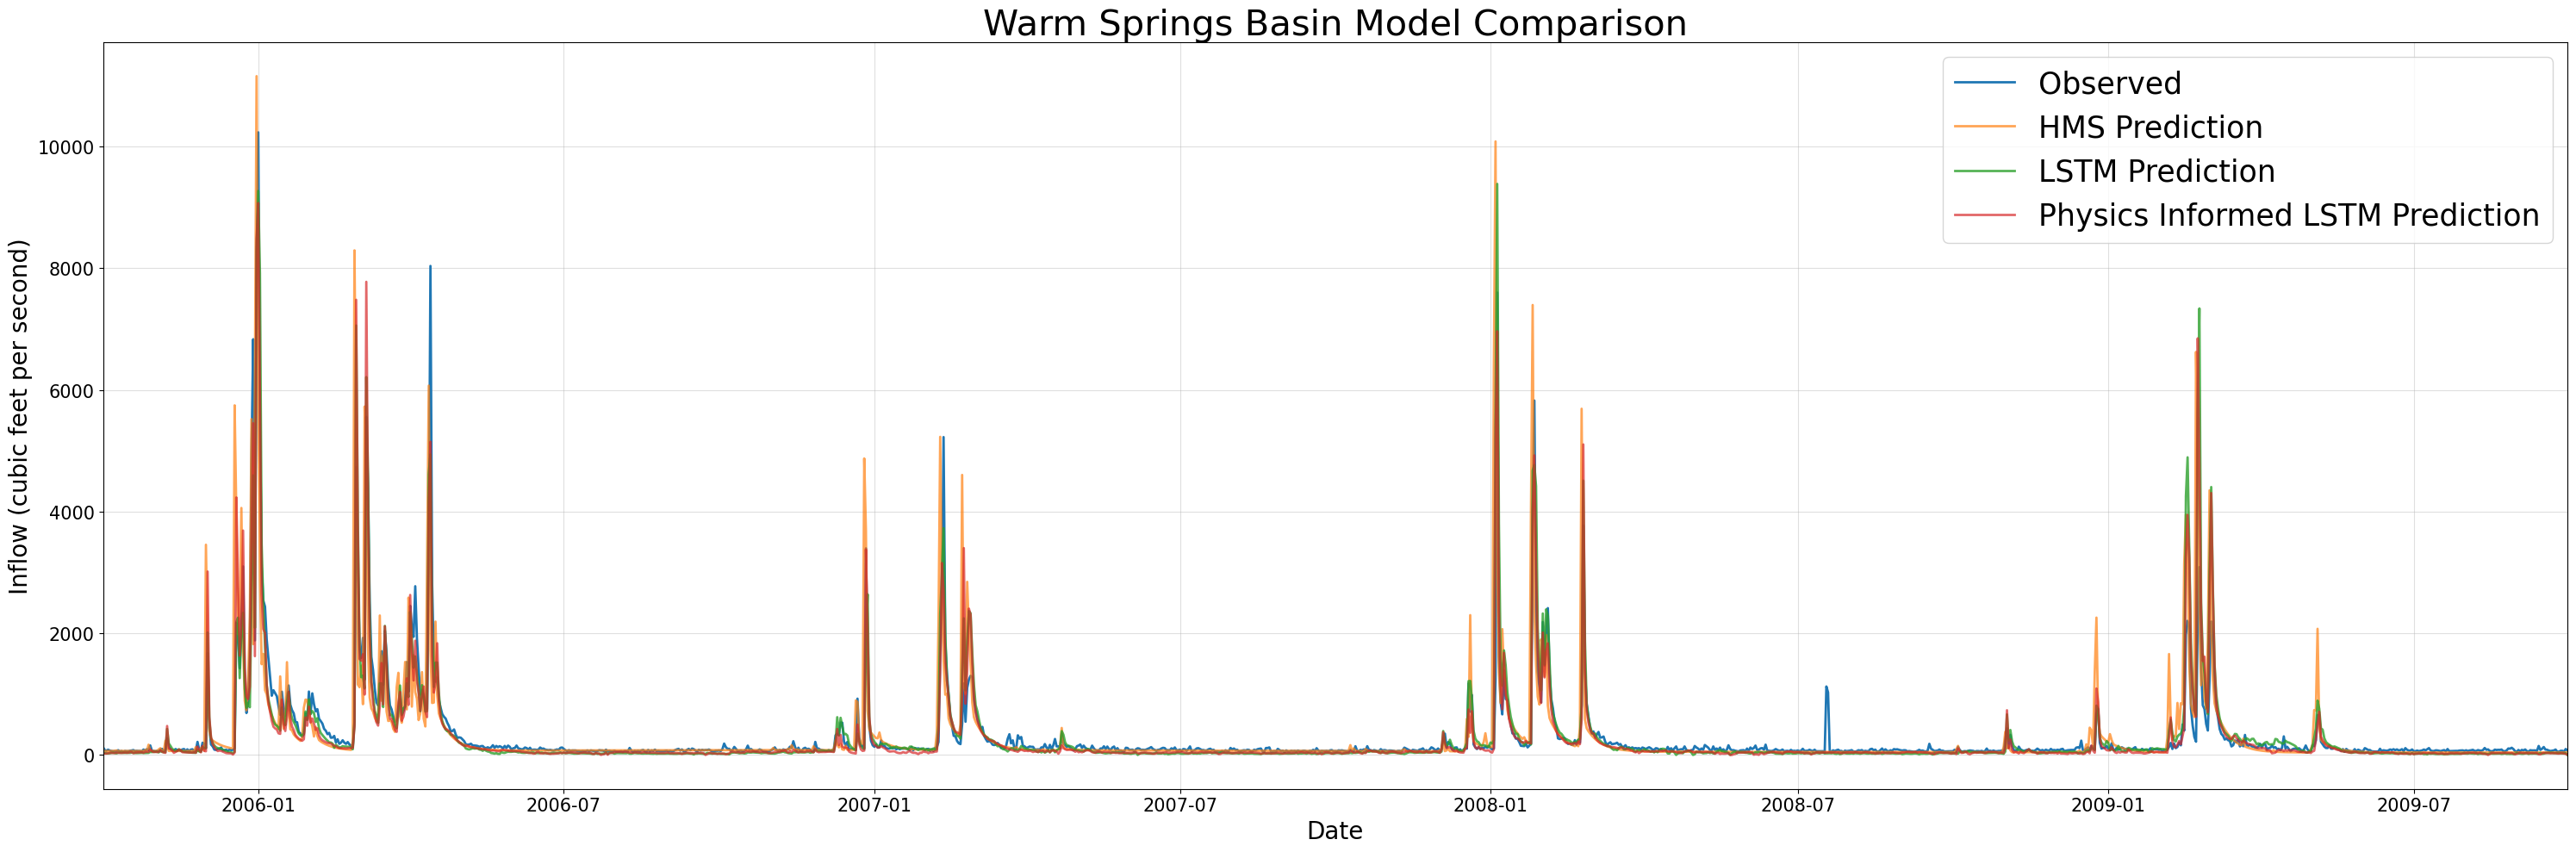

In [64]:
myplot, metrics_df = combinedPlot(lstm_results=lstm_result_path, lstmPhysics_results= physics_informed_result_path, HMS_results=path_to_physics_data, title='Warm Springs Basin Model Comparison', fName = "warm_springs_metrics.csv")

In [66]:
metrics_df

,HMS,LSTM,Physics_Informed_LSTM
NSE,0.101514,0.797407,0.830457
MSE,480827.273656,108418.471604,90731.678204
RMSE,693.417099,329.269603,301.216995
KGE,0.589591,0.847821,0.853256
Alpha-NSE,1.179503,1.125088,1.075135
Beta-KGE,1.037956,0.975170,0.899017
Beta-NSE,0.015436,-0.010098,-0.041069
Pearson-r,0.632885,0.916965,0.924562
FHV,24.454837,16.473226,11.797047
FMS,25.356069,102.172300,60.020663
